#Proyecto final DS

* Alumno: Rodrigo Caparros
* Comison: 49150

## Sección 1 - Abstract y contexto

###1.1 Abstract

La prevención de enfermedades mediante un análisis de grandes volumenes de datos es posible gracias las nuevas herramientas que nos brinda la ciencia de Datos. En el presente trabajo se utilizan dichas herramientas para identificar cuales son los factores que aumentan el riesgo de tener un ACV

###1.2 Contexto


Un derrame cerebral, también conocido como accidente cerebrovascular o ACV, se produce cuando una parte del cerebro pierde su suministro de sangre y la parte del cuerpo que controlan las células cerebrales privadas de sangre deja de funcionar. Esta pérdida de suministro de sangre puede ser isquémica debido a la falta de flujo sanguíneo o hemorrágica debido a una hemorragia en el tejido cerebral. Un accidente cerebrovascular es una emergencia médica porque puede provocar la muerte o una discapacidad permanente.
Según la Organización Mundial de Accidentes Cerebro- vasculares (WSO, por sus siglas en inglés), el ACV es la segunda causa de muerte y la primera de discapacidad a nivel mundial. Cada año se registran 12.2 millones de nuevos casos, de los cuales 6.6 millones son fatales

Existen oportunidades para tratar los accidentes cerebrovasculares isquémicos, pero el tratamiento debe iniciarse en las primeras horas después de que comiencen los signos de un accidente cerebrovascular. Por ello es sumamente importante identificar a pacientes con alto riesgo de tener un accidente para poder tomar medidas preventivas y capacitaciones para poder actuar rápidamente.







##Sección 2 - Preguntas y objetivos del trabajo

###2.1 Objetivo

El objetivo final de presente trabajo es identificar los factores o combinación de factores que aumentan el riesgo de tener un ACV para poder actuar anticipadamente informando a pacientes de puedan padecerlo

###2.2 Preguntas a contestar

Se pantean interrogantes referidos a la relación entre la historia clínica del paciente y la relación entre diferentes parámetros


* ¿Que rango etario tiene mas riesgo de ACV?
* ¿Como afecta el tabaquismo en el riesgo de ACV?
* ¿Como influye la hipertension en el riesgo de ACV?
* ¿Como afecta el tipo de trabajo en el riesgo de ACV?
* Analisis univariado de riesgo de ACV por cada variable
* Analisis Bivariado por combinación de 2 variables. Por ejemplo Edad/genero; fumador/genero
* ¿Existe correlacion entre bmi y nivel de glucemia?
* ¿Existe correlacion entre el tipo de trabajo y el bmi?
* ¿Existe correlacion entre bmi e hipertension?
* ¿Existe correlacion entre tipo de residencia y bmi?
* H0 Las mujeres son mas propensas a sufrir un ACV
* Analisis multivariado
* ¿Cual es la combinacion de parametros que aumenta el riesgo de padecer un ACV?
* ¿Cuales son las 3 afecciones que aumentan más el riesgo de tenes la enfermedad?
* ¿Como podemos prevenir que suceda un ACV?
* ¿Que conocimientos debería tener el paciente de alto riesgo para poder actuar
  rápidamente y evitar secuelas?

###2.3 Pregunta objetivo

¿Que combinación de características o enfermedades previas aumentan más el riesgo de padecer un ACV?

###2.4 Objetivo adicional

Alertar a personas que no hayan sufrido la enfermedad pero tengan altas probabilodades de padecerla

## Seccion 3 - Importación de librerías

### 3.1 Instalaciones

In [1]:
!pip install scikit-optimize
!pip install catboost
!pip install lightgbm
!pip install tensorflow
!pip install mlflow
!pip install pynvml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

### 3.2 Imports

In [64]:
#Graficos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline # NUEVO
from sklearn.compose import ColumnTransformer # NUEVO

#Correlacion
from scipy.stats import pointbiserialr, spearmanr, pearsonr

# Detección de outliers
from sklearn.ensemble import IsolationForest

#Modelos de clasificacion
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

#Modelos de regresion
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# Modelos de Redes Neuronales
import tensorflow as tf # NUEVO
from tensorflow.keras import backend as K # NUEVO
from tensorflow.keras.models import Sequential # NUEVO
from tensorflow.keras.layers import Dense, InputLayer # NUEVO
from tensorflow.keras.utils import to_categorical, plot_model # NUEVO
from tensorflow.keras.optimizers import Adam # NUEVO
from tensorflow.random import set_seed # NUEVO
from tensorflow.keras.initializers import RandomNormal, Constant # NUEVO

#Tratamiento de datos
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Desbalanceo de Clases
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier

# Feature Engineering
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import PolynomialFeatures
#import eli5
#from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance

#Metricas
#from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Selección de Modelos
from sklearn.model_selection import GridSearchCV, cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

import scipy.stats as stats
from sklearn import datasets

from types import resolve_bases

import os
from IPython.display import clear_output
import json
from joblib import dump, load

# Monitoreo
# ==============================================================================
import mlflow
import psutil  # Para métricas del sistema
import pynvml # Para métricas de GPU

###3.3 Configuraciones:

In [3]:
sns.set_style("darkgrid")

#Paleta de colores
colores = ['#5D7CA6','#023059','#73A2BF','#59362E']

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Sección 4 - Data Acquisition

###4.1 Descripción del dataset


El dataset seleccionado corresponde a la base de datos de 43.400 pacientes de un hospital. Algunos de ellos han tenido un ACV (Accidente cerebro vascular).
El conjunto de datos de accidentes cerebrovasculares cerebrales consta de 12 features, incluida la columna de destino que está desequilibrada.

Fuente: https://www.kaggle.com/datasets/shashwatwork/cerebral-stroke-predictionimbalaced-dataset/

Los datos originarios fueron extraídos de “HealthData.gov” que como menciona en su página, sus datasets son recopilaciones de datos provenientes de instituciones médicas, centros de control y prevención y el Departamento de Salud de EEUU

Estos datos, originalmente en formato .csv, se guardan en un repositorio de github para poder simplificar el acceso sin tener que conectarse a Google Drive ni compartir el archivo

### 4.2 - Descripcion de las variables


* id: Identificación única del paciente
* gender: género
* age: Edad
* hypertension: Si padece hipertensión arterial (0 No padece / 1 Si padece)
* heart_disease: Si padece alguna enfermedad cardíaca (0 No padece / 1 Si padece)
* ever_married: Si padeció el casamiento (Yes / No)
* work_type: Tipo de trabajo (Private: Empleado; Govt_job: Empleado del gobierno; Self-employed: Independiente, etc)
* Residence_type: Tipo de recidencia (Rural / Urban)
* avg_glucose_level: Nievel medio de glucosa
* bmi: Indice de masa corporal
* smoking_status: Condición de fumador (smokes: fuma ; never smoked: Nunca fumó ; formerly smoked: Ex fumador)
* stroke: Si tuvo o no tuvo un ACV (0 = No tuvo ; 1 = Si tuvo)

### 4.3 - Carga de datos y visualización de datos

In [40]:
# Cargo y visualizo el dataset desde url de GitHub
url = 'https://raw.githubusercontent.com/Lumirdor/datasets/main/pacientes_hospital.csv'
df = pd.read_csv(url)
df.head(6)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0


## Sección 5 - EDA

 Análisis exploratorio de datos

###5.1 Pre Visualización de datos

Chequeo tipos de datos de cada feature

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


Se observan varios datos del tipo "object" que en realdiad son categóricos. Se procesaran esos datos en la siguiente sección

Resumen de datos numéricos

In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


Aqui podemos visualizar que la edad promedio de los pacientes es de 42 años y va desde recién nacidos a personas de 82 años. Tambien, niveles medios de indice de masa corporar y glucosa en sangre

A continuación muestro cantidad de valores unicos para cada feature

In [8]:
df.nunique().sort_values()

hypertension             2
heart_disease            2
ever_married             2
Residence_type           2
stroke                   2
gender                   3
smoking_status           3
work_type                5
age                    104
bmi                    555
avg_glucose_level    12543
id                   43400
dtype: int64

Se observa claramente cuales variables son del tipo categoricas y cuales del tipo numéricas

A continuacón observo, si hay, la cantidad de datos nulos en el dataset

In [9]:
print(df.isnull().sum())

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


Se observa que hay 1.462 datos nulos en el campo bmi y 13.292 datos nuos en el campo smoking_status

Verifico si hay valores infinitos dentro de los valores enteros

In [10]:
tiene_inf_bmi = np.isinf(df[['bmi','avg_glucose_level','age']]).any()
print(tiene_inf_bmi)

bmi                  False
avg_glucose_level    False
age                  False
dtype: bool


Verifico duplicados

In [11]:
df.id.duplicated().sum()

0

No hay pacientes duplicados por ID

### 5.2 Analisis Univariado

Analizo que cantidad de personas tuvieron un ACV del total de pacientes del hospital

In [12]:
# Filtro a las personas que tuvieron un ACV (stroke = 1)
df_stroke = df[df['stroke'] == 1]
total_ACV = df['stroke'].astype('int').sum()
print ('Cantidad de pacientes que sufrieron un ACV: ', total_ACV, 'de un total de', df['stroke'].count())

Cantidad de pacientes que sufrieron un ACV:  783 de un total de 43400


Agrupo por edades a las personas y sumo cantidad de casos positivos de ACV

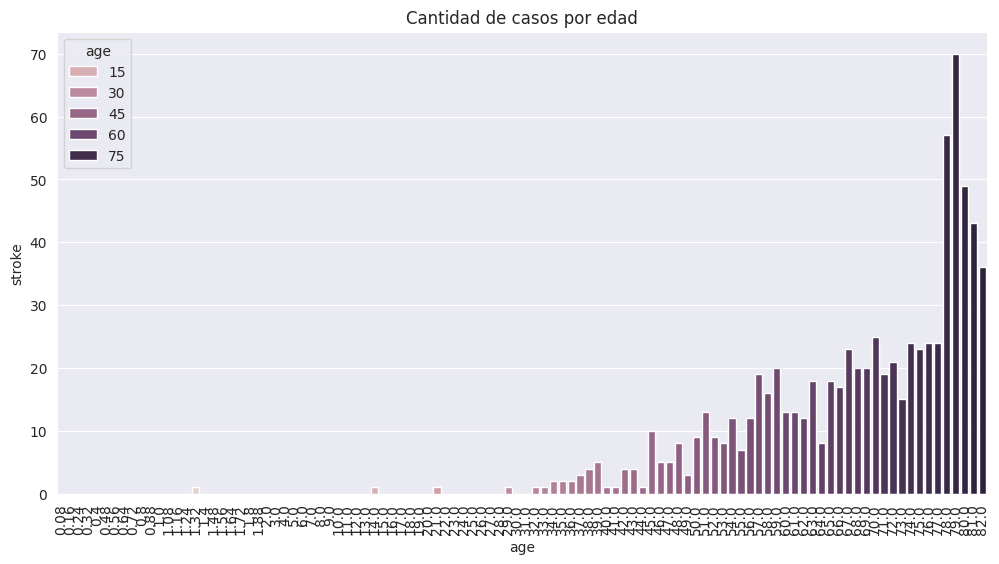

In [13]:
df_edad_stroke = df.groupby('age')['stroke'].sum().reset_index()
plt.figure(figsize = (12,6))
sns.barplot(data = df_edad_stroke, x = 'age', y = 'stroke', errorbar = None, order = df_edad_stroke['age'], hue = 'age')
plt.title('Cantidad de casos por edad')

plt.xticks(rotation = 90)
plt.show()

In [14]:
#Observo el promedio de edades en el conjunto de datos positivos
df_stroke.age.mean() #Aqui se ve que la edad es uno de los factores mas influyentes

68.14344827586207

Text(0, 0.5, 'Casos de ACV')

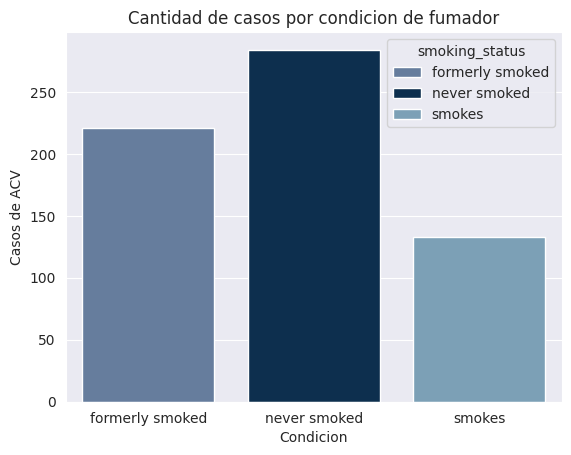

In [43]:
# De los casos positivos veo en que proporcion afecta a personas fumadoras y no fumadoras

sns.countplot(data = df_stroke, x = 'smoking_status', hue = 'smoking_status',palette=[colores[0],colores[1],colores[2]])

# Agrego título
plt.title('Cantidad de casos por condicion de fumador')

# Agrego labels de ejes
plt.xlabel('Condicion')
plt.ylabel('Casos de ACV')

Se observa que el ser fumador o fumadora no influye significativamente en el riesgo de un ACV para esta muestra

### 5.3 Analisis Bivariado

####5.3.1 Hombres y mujeres según empleo

Analisis de casos de ACV en mujeres y hombres segun su tipo de empleo

Text(0, 0.5, 'Casos de ACV')

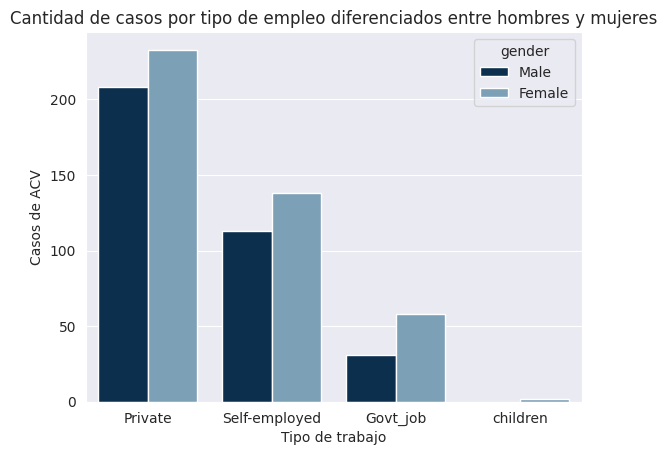

In [44]:
#Analizo los casos de ACV segun mujeres y hombres y su tipo de empleo
sns.countplot(data = df_stroke, x = 'work_type', hue = 'gender',palette=[colores[1],colores[2]])

# Agrego título
plt.title('Cantidad de casos por tipo de empleo diferenciados entre hombres y mujeres')

# Agrego labels de ejes
plt.xlabel('Tipo de trabajo')
plt.ylabel('Casos de ACV')

Claramente la cantidad de casos es mayor en personas empleadas. Aunque estos valores no son significativos pues es posible que hayan mas personas con empleo privado que auto-empleados y trabajadores estatales. Para poder comparar bien es necesario normalizar las muestras. Tambien se observa que hay mas casos en mujeres que hombres por lo que se analizará estadísticamente este caso.

####5.3.2 ACV en hombres y mujeres

Análisis estadístico de casos de ACV en hombres y mujeres

Hipotesis = Hay mas casos de ACV en mujeres que en hombres
* H0 = El promedio de casos de mujeres es igual al de hombres.
* H0: Mu_hombres = Mu_mujeres
* H1 = Mu_hombres =! Mu_mujeres

In [17]:
#Divido el dataframe completo en hombres y mujeres
df_mujeres = df[df['gender'] == 'Female']
df_hombres = df[df['gender'] == 'Male']

#Calculo el promedio de hombres que tuvieron un ACV, es decir con stroke = 1. Este valor esta normalizado ya que suma todos los "1" y los divide por el total de hombres
df_hombres_mean = df_hombres['stroke'].mean()

#Realizo una prueba t para un nivel de significancia alfa = 5%
t_stat, p_valor = stats.ttest_1samp(a=df_mujeres['stroke'], popmean = df_hombres_mean)

print(f'El p valor para la hipotesis de que el riesgo en ACV en hombres es igual que en mujeres es:{p_valor} \ny su estadistico: {t_stat.round(2)} lo que evidencia que se rechaza H0 pero hay una discrepancia en el sentido de la variación ya que t_stat es negativo')


El p valor para la hipotesis de que el riesgo en ACV en hombres es igual que en mujeres es:0.0001319140608899619 
y su estadistico: -3.82 lo que evidencia que se rechaza H0 pero hay una discrepancia en el sentido de la variación ya que t_stat es negativo


Cuanto mas cerca de cero el P_valor indica que se rechaza con mayor confianza la hipotesis nula, en este caso H0 dice que el promedio de mujeres que sufrio un ACV es mayor que el de hombres
El valor de p_valor me da menor a un 5% por lo que se puede concluir que la hipotesis es falsa con un nivel de confianza de 1-alfa = 0.9998. Lo sorprendente es que al ser t_stat negativo me invierte totalmete la suposicion de que las mujeres tenian mas riesgos de tener un ACV. Es decir la nueva hipótesis es que los hombres tienene más posibilidades de tener un ACV. Esto puede ser explicado pues posiblemente la cantidad de pacientes mujeres sea mayor y en consecuencia la media calculada disminuya.


Considerando los resultados anteriores vuelvo a realizar el análisis con la nueva hipótesis
Hipotesis = Hay mas casos de ACV en mujeres que en hombres
* H0 = El promedio de casos de mujeres es igual al de hombres.
* H0: Mu_hombres = Mu_mujeres
* H1 = Mu_hombres > Mu_mujeres

In [18]:
# Realizo la misma prueba t pero con H0 = Promedio de casos de ACV en hombres. Mi hipótesis es que el riesgo de ACV en mujeres es menor que en hombres.
df_mujeres_mean = df_mujeres['stroke'].mean()

#Realizo una prueba t para un nivel de significancia alfa = 5%. Al probar solo para un lado de la ditribución debo dividir en 2 el p_valor
t_stat, p_valor = stats.ttest_1samp(a=df_hombres['stroke'], popmean = df_mujeres_mean)

print(f'El p valor para la hipotesis de que el riesgo en ACV en hombres es igual que en mujeres es:{p_valor/2} \ny su estadistico: {t_stat.round(2)} por lo que se rechaza la hipotesis nula')

#Realizo la prueba t pero comparando las 2 poblaciones
t_stat_comp, p_valor_comp = stats.ttest_ind (a= df_mujeres['stroke'], b=df_hombres['stroke'], equal_var = False)

print(f'El p valor para la hipotesis de que el riesgo en ACV en hombres es igual que en mujeres es:{p_valor_comp/2}\ny su estadistico: {t_stat_comp.round(2)}')

El p valor para la hipotesis de que el riesgo en ACV en hombres es igual que en mujeres es:0.0017173635076874773 
y su estadistico: 2.93 por lo que se rechaza la hipotesis nula
El p valor para la hipotesis de que el riesgo en ACV en hombres es igual que en mujeres es:0.010071144278962817
y su estadistico: -2.32


La conclusion de este análisis es que para la muestra suministrada los hombres tuvieron más casos de ACV en promedio que las mujeres aunque en un primer analisis gráfico parecía los contrario

####5.3.3 ACV por Hipertensión

Analisis de la relacion entre la hipertension arterial y la ocurrencia de ACV

Text(0, 0.5, 'Índice de masa corporal')

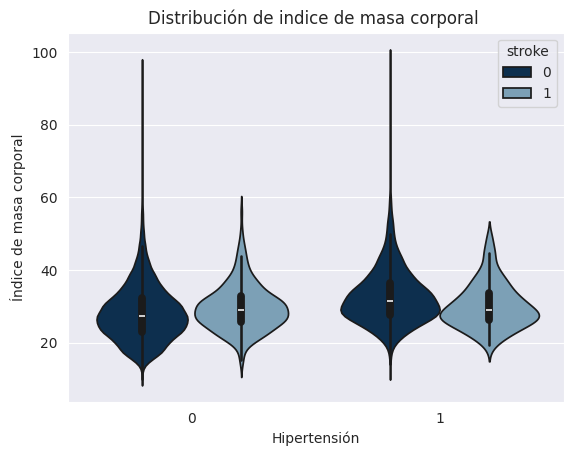

In [45]:
#Comparo las distribuciones de indice de masa corporal de personas con hipertension arterial que hayan sufrido un ACV
sns.violinplot(df, x='hypertension',y='bmi',hue = 'stroke', palette = [colores[1],colores[2]])

# Agrego título
plt.title('Distribución de indice de masa corporal ')

# Agrego labels de ejes
plt.xlabel('Hipertensión')
plt.ylabel('Índice de masa corporal')

En los graficos tipo "Violin" no se aprecian diferencias importantes entre personas hipertensas y personas con presion arterial normal. Pero por experiencia, es un valor significante. Se seguirá analizando este parametro combinado con otros factores de riesgo en el desarrollo del trabajo final

### 5.4 Analsis multivariado

Se analiza la relacion entre las variables edad, bmi y nivel de glucosa en los casos positivos de ACV. A simple vista se observa que no hay una relación lineal entre alguna de estas variables. En el gráfico de nivel de glucosa podemos diferenciar 2 grandes zonas. Una con valores normales de glucosa y otra con valores mas altos (Prediabetes o diabetes)

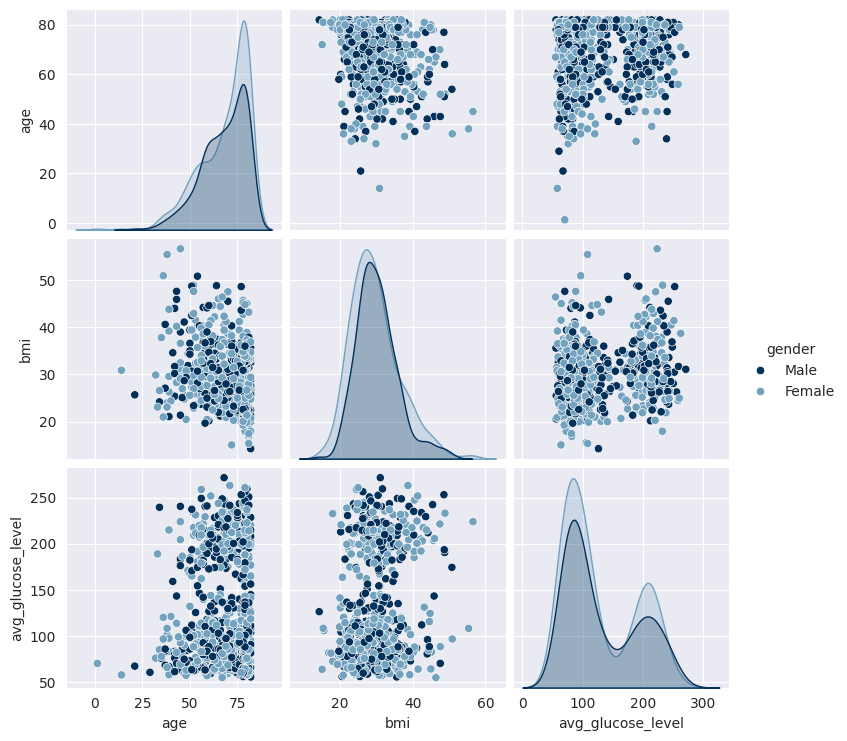

In [46]:
new_df = df_stroke[['age','bmi', 'avg_glucose_level','gender']]

sns.pairplot(data=new_df,hue = 'gender', palette = [colores[1],colores[2]])

Text(0, 0.5, 'Nivel de glucosa en sangre')

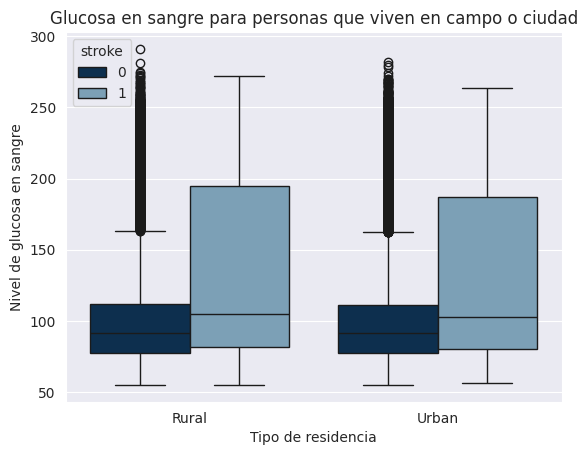

In [47]:
# Analizo como influye el tipo de residencia en los niveles de glucosa en sangre y diferenciando personas que sufrieron un ACV y las que no
sns.boxplot(data=df, x='Residence_type', y='avg_glucose_level', hue='stroke', palette = [colores[1],colores[2]])

# Agrego título
plt.title('Glucosa en sangre para personas que viven en campo o ciudad')

# Agrego labels de ejes
plt.xlabel('Tipo de residencia')
plt.ylabel('Nivel de glucosa en sangre')

Se observa que practicamente no hay diferencia entre personas que viven en la ciudad o en el campo pero que si son muy distintas la graficas de personas que tuvieron un ACV y las que no. Es decir, la media de niveles de glucosa de personas que tuvieron ACV es mayor y ademas el rango es mas amplio hacia la parte superior, lo que significa que muchas personas con diabetes padecieron la enfermedad. Esto se tendrá en cuenta en futuras comprobaciones

###5.5 Conclusión de la visualización de datos


Podemos concluir de lo expuesto que la edad es un gran factor de riesgo de contraer un ACV. Tambien el nivel de glucemia en sangre parece influir. No hay datos precisos sobre la hipertensión pero se seguira investigando sobre esto. Tambien, se observa, que hay mas casos de ACV en mujeres que hombres pero al normalizar los datos la probabilidad es mas alta en hombres que mujeres

##Seccion 6 - Preprocesado de datos

###6.1 Tratamiento de nulos

Se observa que bmi tiene 1462 datos nulos. lo que representa un 3,36% de los datos. El bmi relaciona el peso de la persona con su altura. Por esta razon se reemplazará en primer término el valor de bmi por la media. Si se comprueba que el bmi es una variable importante por ser relativamente pocos datos se van a eliminar las filas del modelo

In [22]:
mean_imputer = SimpleImputer(strategy='mean')
df.loc[:, 'bmi'] = mean_imputer.fit_transform(df[['bmi']])

Se observan tambien 13.292 datos nulos en el campo smoking_status. Se reemplazaran estos datos por el string "Unknow" para indicar que se desconoce ese valor pero sin perder la información de las demás columnas

In [23]:
smoking_imputer = SimpleImputer(strategy='constant', fill_value = "Unknow")
df.loc[:, 'smoking_status'] = smoking_imputer.fit_transform(df[['smoking_status']])
print("\nDatos nulos por cada feature:\n",df.isnull().sum())


Datos nulos por cada feature:
 id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


Se observa que ya no hay valores nulos en el dataset

###6.2 Data Wrangling

Reviso los tipos de datos del dataset

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                43400 non-null  float64
 10  smoking_status     43400 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


Voy a cambiar las variables gender, hypertension, heart disease, ever married, work_type, Residence_type, smoking_status, stroke a categorica para un mejor procesamiento futuro

In [25]:
#Cambio de tipo de variable
var_cat = ['id','gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','stroke']
df[var_cat] = df[var_cat].astype('category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 43400 non-null  category
 1   gender             43400 non-null  category
 2   age                43400 non-null  float64 
 3   hypertension       43400 non-null  category
 4   heart_disease      43400 non-null  category
 5   ever_married       43400 non-null  category
 6   work_type          43400 non-null  category
 7   Residence_type     43400 non-null  category
 8   avg_glucose_level  43400 non-null  float64 
 9   bmi                43400 non-null  float64 
 10  smoking_status     43400 non-null  category
 11  stroke             43400 non-null  category
dtypes: category(9), float64(3)
memory usage: 2.8 MB
None


Preparo las columnas del df para ser procesadas por los modelos de clasificacion:
* A las variables categóricas las proceso utilizando label encoder o get dummies según corresponda
* A las variables numéricas tipo float aplico standard scaler

In [26]:
# Separo las columnas en numéricas, categóricas binarias y categóricas multiclase
num_features = ['avg_glucose_level', 'bmi']
binary_cat_features = ['hypertension','heart_disease','ever_married', 'Residence_type','stroke']
multi_cat_features = [col for col in df.columns if df[col].nunique() > 2 and col not in num_features + ['id']]

# Aplico LabelEncoder a las columnas binarias
label_encoder = LabelEncoder()
for col in binary_cat_features:
    df[col] = label_encoder.fit_transform(df[col])

# Aplico get_dummies a las columnas multiclase
df_multi_cat_dummies = pd.get_dummies(df[multi_cat_features])

# Defino el scaler y escalo las columnas numéricas
#Este paso debe ser ejecutado luego del split por lo que no se realiza en esta instancia
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df[num_features]), columns=num_features)

# Combino todas las columnas procesadas
df_limpia = pd.concat([df.id,df_num_scaled ,df[binary_cat_features], df_multi_cat_dummies], axis=1)

df_limpia.head(7)

,id,avg_glucose_level,bmi,hypertension,heart_disease,ever_married,Residence_type,stroke,age,gender_Female,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknow,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,30669,-0.217176,-1.388469,0,0,0,0,0,3.0,False,...,False,False,False,False,False,True,True,False,False,False
1,30468,-0.383258,1.387150,1,0,1,1,0,58.0,False,...,False,False,False,True,False,False,False,False,True,False
2,16523,0.148621,-1.440839,0,0,0,1,0,8.0,True,...,False,False,False,True,False,False,True,False,False,False
3,56543,-0.822123,0.955096,0,0,1,0,0,70.0,True,...,False,False,False,True,False,False,False,True,False,False
4,46136,1.317458,-1.244451,0,0,0,0,0,14.0,False,...,False,False,True,False,False,False,True,False,False,False
5,32257,2.469593,2.814237,0,0,1,1,0,47.0,True,...,False,False,False,True,False,False,True,False,False,False
6,52800,-0.623799,-1.427747,0,0,1,1,0,52.0,True,...,False,False,False,True,False,False,False,True,False,False


###6.3 Deteccion de outliers

Utilizo los 3 métodos aprendidos en clase para la detección de outliers y los comparo para dejarlos a disposición del profesional para la toma de decisiones

Método IQR

In [27]:
#Funcion para detectar outliers:
def detectar_outliers_iqr(df, columnas):
    resultado_outliers = pd.DataFrame(index=df.index)

    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        es_outlier = (df[columna] < limite_inferior) | (df[columna] > limite_superior)

        resultado_outliers[columna] = es_outlier

    return resultado_outliers

In [28]:
columnas_a_analizar = ['age','avg_glucose_level','bmi',]#df.drop('Class', axis=1).columns
outliers_iqr = detectar_outliers_iqr(df, columnas_a_analizar)

print(outliers_iqr)

         age  avg_glucose_level    bmi
0      False              False  False
1      False              False  False
2      False              False  False
3      False              False  False
4      False              False  False
...      ...                ...    ...
43395  False              False  False
43396  False               True   True
43397  False              False  False
43398  False              False  False
43399  False              False  False

[43400 rows x 3 columns]


Método z_score

In [29]:
#Función para detectar outliers z_score
def detectar_outliers_zscore(df, columnas, umbral=3):
    resultado_outliers = pd.DataFrame(index=df.index, columns=columnas)

    for columna in columnas:
        media = df[columna].mean()
        desviacion_std = df[columna].std()

        # Calcula el Z-score absoluto
        z_score = ((df[columna] - media) / desviacion_std).abs()

        # Marca como True los outliers y False los demás
        resultado_outliers[columna] = z_score > umbral

    return resultado_outliers

In [30]:
# Aplicar la función a las columnas de interés
outliers_zscore = detectar_outliers_zscore(df, columnas_a_analizar)

print(outliers_zscore)

         age  avg_glucose_level    bmi
0      False              False  False
1      False              False  False
2      False              False  False
3      False              False  False
4      False              False  False
...      ...                ...    ...
43395  False              False  False
43396  False              False   True
43397  False              False  False
43398  False              False  False
43399  False              False  False

[43400 rows x 3 columns]


Método Isolation Forest

In [31]:
# Suponiendo que 'columnas_a_analizar' contiene las columnas de interés en tu DataFrame 'df'
clf = IsolationForest(random_state=49150)
df['outlier_isolation'] = clf.fit_predict(df[columnas_a_analizar])

# Convertir las etiquetas de -1 (outlier) y 1 (no outlier) a 0 y 1, respectivamente
df['outlier_isolation'] = df['outlier_isolation'].map({-1: 1, 1: 0})

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,outlier_isolation
0,30669,Male,3.0,0,0,0,children,0,95.12,18.0,Unknow,0,0
1,30468,Male,58.0,1,0,1,Private,1,87.96,39.2,never smoked,0,0
2,16523,Female,8.0,0,0,0,Private,1,110.89,17.6,Unknow,0,1
3,56543,Female,70.0,0,0,1,Private,0,69.04,35.9,formerly smoked,0,0
4,46136,Male,14.0,0,0,0,Never_worked,0,161.28,19.1,Unknow,0,1


In [32]:
# Definir una regla heurística donde un registro se considera un outlier si al menos el 80% de las columnas lo indican
porcentaje_para_outlier = 0.8

# Calcular el porcentaje de columnas que consideran cada registro como outlier para Z-score y IQR
porcentaje_outliers_zscore = outliers_zscore.mean(axis=1)
porcentaje_outliers_iqr = outliers_iqr.mean(axis=1)

# Aplicar la regla heurística para marcar registros como outliers en el DataFrame original
df['outlier_zscore'] = porcentaje_outliers_zscore >= porcentaje_para_outlier
df['outlier_iqr'] = porcentaje_outliers_iqr >= porcentaje_para_outlier

# Convertir los booleanos a valores numéricos para consistencia con 'outliers_isolation'
df['outlier_zscore'] = df['outlier_zscore'].astype(int) * 1  # 1 para outliers, 0 para no outliers
df['outlier_iqr'] = df['outlier_iqr'].astype(int) * 1  # 1 para outliers, 0 para no outliers

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,outlier_isolation,outlier_zscore,outlier_iqr
0,30669,Male,3.0,0,0,0,children,0,95.12,18.0,Unknow,0,0,0,0
1,30468,Male,58.0,1,0,1,Private,1,87.96,39.2,never smoked,0,0,0,0
2,16523,Female,8.0,0,0,0,Private,1,110.89,17.6,Unknow,0,1,0,0
3,56543,Female,70.0,0,0,1,Private,0,69.04,35.9,formerly smoked,0,0,0,0
4,46136,Male,14.0,0,0,0,Never_worked,0,161.28,19.1,Unknow,0,1,0,0


In [33]:
df[df['stroke']==1][['outlier_isolation', 'outlier_zscore', 'outlier_iqr']]

,outlier_isolation,outlier_zscore,outlier_iqr
63,1,0,0
81,1,0,0
141,1,0,0
257,1,0,0
264,1,0,0
...,...,...,...
43148,0,0,0
43268,0,0,0
43304,0,0,0
43318,0,0,0


Se observa que el metodo Forest Isolation es mas sensible a la deteccion de outliers. Se deberá consultar con un experto en medicina el significado de los valores anomalos para cada variable y si predisponen al paciente a tener un ACV

###6.4 Correlación

Analisis de correlacion:
Verifico la relación entre la totalidad de las variables del dataset con lo casos positivos de ACV

Coeficiente Phi para Nominal vs Nominal

In [55]:
# Features nominales:
nominales = ['hypertension','heart_disease','ever_married','gender_Male','gender_Female','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','Residence_type',
             'smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']

lista_nombres = []
lista_valores = []

for nominal in nominales:
  phi_coe = pearsonr(df_limpia['stroke'], df_limpia[nominal])[0]
  nombre = "phi_coefficient" + "_" + nominal + ":"

  lista_nombres.append(nombre)
  lista_valores.append(phi_coe)

df = pd.DataFrame({'Coeficiente': lista_nombres, 'valor': lista_valores})
df

,Coeficiente,valor
0,phi_coefficient_hypertension:,0.075332
1,phi_coefficient_heart_disease:,0.113763
2,phi_coefficient_ever_married:,0.071920
3,phi_coefficient_gender_Male:,0.011352
4,phi_coefficient_gender_Female:,-0.011281
5,phi_coefficient_work_type_Govt_job:,-0.004782
6,phi_coefficient_work_type_Never_worked:,-0.008674
7,phi_coefficient_work_type_Private:,-0.002464
8,phi_coefficient_work_type_Self-employed:,0.061195
9,phi_coefficient_work_type_children:,-0.054115


Coeficiente biserial Nominal vs Numérico

In [58]:
# Features numericos:
numericos = ['age','bmi', 'avg_glucose_level']

lista_nombres = []
lista_valores = []

for numerico in numericos:
  phi_coe = pointbiserialr(df_limpia['stroke'], df_limpia[numerico])[0]
  nombre = "biserial_coefficient" + "_" + numerico + ":"

  lista_nombres.append(nombre)
  lista_valores.append(phi_coe)

df = pd.DataFrame({'Coeficiente': lista_nombres, 'valor': lista_valores})
df

,Coeficiente,valor
0,biserial_coefficient_age:,0.156049
1,biserial_coefficient_bmi:,0.018407
2,biserial_coefficient_avg_glucose_level:,0.078917


Coeficiente Spearman para Ordinal vs Ordinal:

In [60]:
# 'bmi' (Ordinal) y 'age' (tratadas como ordinales solo para este ejemplo)
spearman_coefficient = spearmanr(df_limpia['bmi'], df_limpia['age'])[0]
print('spearman_coefficient: ', spearman_coefficient)

spearman_coefficient:  0.38348763562087324


Coeficiente Pearson para Numérico vs Numérico

In [62]:
# 'age' (Numérico) y 'bmi' (Numérico)
pearson_coefficient = pearsonr(df_limpia['age'], df_limpia['avg_glucose_level'])[0]
print('pearson_coefficient: ', pearson_coefficient)

pearson_coefficient:  0.2376268428055483


Conclusiones del analisis de correlacion:
Se observa que no hay correlacion lineal significativa entre variables pero si se nota una leve correlacion entre la edad de las personas y la ocurrencia de ACV, tambien una correlacion leve entre las personas que tuvieron ataques cardiacos y los que tuvieron ACV. Analizando otras variables se ve que hay correlacion leve entre edad e indice de masa corporal y nivel de glucosa en sangre

##Sección 7 - Balanceo de clases

Al ser un dataset muy desbalanceado se aplica la técnica de sobre-muestreo para el balanceo de clases

###7.1 Sobre-muestreo

In [37]:
# Defino X e y
X = df_limpia.drop(['stroke'], axis=1)
y = df_limpia['stroke']

# Crear el objeto de sobremuestreo
ros = RandomOverSampler(random_state=49150)
# Aplicar el sobremuestreo
X_resampled, y_resampled = ros.fit_resample(X, y)

###7.2 Movimiento del Umbral

Para este cálculo necesito el modelo actualizado por lo que se realiza en el punto 9.4

##Seccion 8 - Feature engeneer 1° parte

###8.1 Polinomial features

Voy a generar un nuevo dataframe con mas columnas que combinen hasta 3 de las columnas originales

In [38]:
# Defino X
X = df_limpia.drop(['stroke','id'], axis=1)

# Armar PolynomialFeatures de hasta grado 3
poly = PolynomialFeatures(degree=3, include_bias=False)

# Ajustar y transformar las nuevas variables
X_poly = poly.fit_transform(X)

feature_names = poly.get_feature_names_out(X.columns)

# Crear nuevo dataframe
df_poly = pd.DataFrame(X_poly, columns = feature_names)

# Visualizar nuevas features
#print(df_poly.head())
df_poly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Columns: 1539 entries, avg_glucose_level to smoking_status_smokes^3
dtypes: float64(1539)
memory usage: 509.6 MB


###8.2 Binning/Bucketing

Genero una nueva variable con los rango etareos según la edad de cada persona

In [39]:
# Defino bins
bins = [0, 12, 30, 45, 60, 70, 100]

# Corto bins
df['rangos_etarios'] = pd.cut(X['age'], bins=bins, labels=False)

# Visualizo resultado
print(df[['age', 'rangos_etarios']].head())

    age  rangos_etarios
0   3.0               0
1  58.0               3
2   8.0               0
3  70.0               4
4  14.0               1


## Seccion 9 - Modelos de clasificación

Al tener que predecir si hay riesgo de ACV o no elijo modelos de clasificación. Hasta ahora, la mejor predicción se logró con un árbol de decisión, aunque aún sigue siendo muy imprecisa

###9.1 Division en train y test

In [63]:
# Defino X e y
#X = df_limpia.drop(['stroke','id'], axis=1)
X = df_limpia.drop(['stroke'], axis=1)
y = df_limpia['stroke']

# Divido el conjunto de datos en conjuntos de entrenamiento y prueba del dataset sin haber hecho balanceo de clases
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=49150, stratify=y)

###9.2 Selección del modelo

Utilizo pipeline con la clase balanceada mediante Over Sampler para encontrar el mejor modelo de clasificación

Busco el mejor modelo de clasificación:

In [ ]:
# Diccionario de datasets
#Cat_features = ['id','hypertension','heart_disease','ever_married','Residence_type','gender_Female','gender_Male',	'gender_Other',	'work_type_Govt_job',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children',	'smoking_status_Unknow',	'smoking_status_formerly', 'smoked',	'smoking_status_never', 'smoked',	'smoking_status_smokes']

datasets = {
    'Casos de ACV': (X_resampled, y_resampled)
}

# Modelos a evaluar
models = {
    'Decision_Tree_Classifier': DecisionTreeClassifier(random_state=49150),
    'Random_Forest_Classifier': RandomForestClassifier(random_state = 49150),
    'XGBoost': XGBClassifier(objective='multi:softmax', num_class=2, seed=49150, enable_categorical=True),
    'Catboost': CatBoostClassifier(iterations=1000, learning_rate=0.1, verbose=False),
    'lgbm': LGBMClassifier(n_estimators=1000, learning_rate=0.1, verbose=-1)
}

# Ejecutar pipeline y evaluar modelos
results = []
for name, (X_resampled, y_resampled) in datasets.items():
  print(f'Training with {name} Dataset')
  X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=49150)
  for model_name, model in models.items():
    print(f'Training model {model_name}')
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)


    precision = model.score(X_test, y_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Dataset': name,
        'Model': model_name,
        'Precision': precision,
        'Accuracy': accuracy,
        'Recall' : recall,
        'fi_score': f1
    })

# Convertir resultados en un DataFrame y mostrarlo
results_df = pd.DataFrame(results)
results_df

Training with Casos de ACV Dataset
Training model Decision_Tree_Classifier


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Training model Random_Forest_Classifier


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Training model XGBoost
Training model Catboost
Training model lgbm


,Dataset,Model,Precision,Accuracy,Recall,fi_score
0,Casos de ACV,Decision_Tree_Classifier,0.521282,0.988925,1.0,0.989005
1,Casos de ACV,Random_Forest_Classifier,0.501244,0.998076,1.0,0.998072
2,Casos de ACV,XGBoost,0.540241,0.963020,1.0,0.964208
3,Casos de ACV,Catboost,0.490591,0.978694,1.0,0.979061
4,Casos de ACV,lgbm,0.512929,0.993195,1.0,0.993216


Grafico los resultados anteriores mediante un grafico de barras

<ipython-input-79-204acff870b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = results_df, x = 'Model', y='fi_score',palette=colores)
<ipython-input-79-204acff870b6>:2: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data = results_df, x = 'Model', y='fi_score',palette=colores)
<ipython-input-79-204acff870b6>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


Text(0, 0.5, 'Valor de f1')

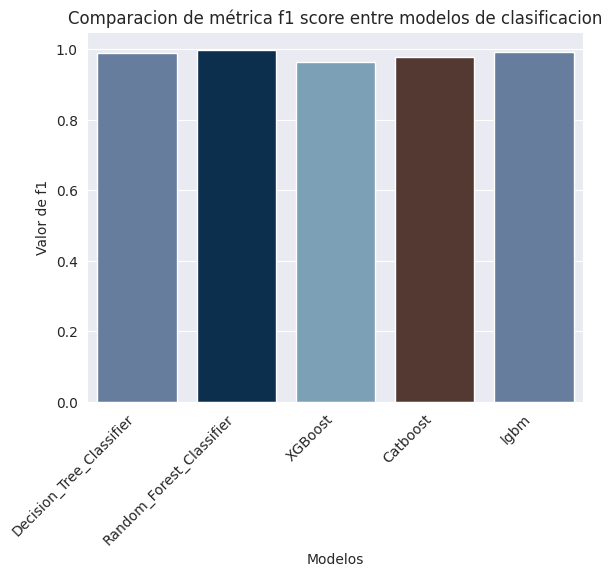

In [ ]:
#Grafico de barras
ax = sns.barplot(data = results_df, x = 'Model', y='fi_score',palette=colores)

# Rotar las etiquetas del eje x a 45 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Agrego título
plt.title('Comparacion de métrica f1 score entre modelos de clasificacion')

# Agrego labels de ejes
plt.xlabel('Modelos')
plt.ylabel('Valor de f1')

Observo que el modelo que mejor ajusta es lgbm por lo que es el que voy a elegir para la predicción

Divido en train y test. Luego escalo las variables numericas

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=49150)

# Defino el scaler y escalo las columnas numéricas de cada particion (Train y test)
#Por el modelo elegido no fue necesario realizar este paso
'''scaler = StandardScaler()
X_train["bmi"] = scaler.fit_transform(X_train[["bmi"]])
X_test["bmi"] = scaler.fit_transform(X_test[["bmi"]])

X_train["avg_glucose_level"] = scaler.fit_transform(X_train[["avg_glucose_level"]])
X_test["avg_glucose_level"] = scaler.fit_transform(X_test[["avg_glucose_level"]])'''

'scaler = StandardScaler()\nX_train["bmi"] = scaler.fit_transform(X_train[["bmi"]])\nX_test["bmi"] = scaler.fit_transform(X_test[["bmi"]])\n\nX_train["avg_glucose_level"] = scaler.fit_transform(X_train[["avg_glucose_level"]])\nX_test["avg_glucose_level"] = scaler.fit_transform(X_test[["avg_glucose_level"]])'

Vuelvo a entrenar el modelo elegido lgbm y observo sus metricas

In [ ]:
# Instanciar LGBM
lgbm = LGBMClassifier(n_estimators=1000, learning_rate=0.1, verbose=-1)

# Ajustar modelo
lgbm.fit(X_train, y_train)

# Predecir
y_pred_lgbm = lgbm.predict(X_test)

# Calcular métricas
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm)#, average='weighted')
recall_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)

# Imprimir métricas
print('Accuracy: ', accuracy_lgbm)
print(cm_lgbm)
print('Precision: ', precision_lgbm)
print('Recall: ', recall_lgbm)
print('F1 Score: ', f1_lgbm)

Accuracy:  0.9924445070158149
[[10534   161]
 [    0 10614]]
Precision:  0.9850580046403712
Recall:  1.0
F1 Score:  0.9924727663752396


Grafico la matriz de confusion con el dataset oversampleado

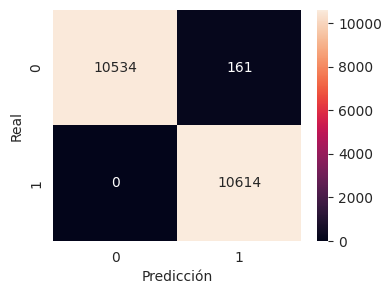

In [ ]:
# Predecir los valores de prueba
y_pred_lgbm = lgbm.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_lgbm)


plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

Se observa que si bien, la prediccion es muy buena, hay valores que fueron predecidos como positivos y en realidad fueron negativos. Se puede seguir mejorando el modelo

###9.3 Optimizacion

Utilizo Bayes search para encontrar los mejores hiperparametros del modeo elegido

Nota: Esto lo hice varias veces y fui ajustando los rangos hasta encontrar el mejor set de hiperparámetros

In [ ]:
# Definir el espacio de búsqueda de hiperparámetros para lgbm

#Segunda iteracion
#('bagging_fraction', 0.975286472236801), ('feature_fraction', 0.9261010516050991), ('learning_rate', 0.2),
#('max_bin', 15), ('max_depth', 90), ('min_data_in_leaf', 1), ('num_iterations', 1500), ('num_leaves', 15)]

#Tercera iteracion
# ([('bagging_fraction', 1.0), ('feature_fraction', 0.8834982012126925), ('learning_rate', 0.25848571877491733),
#('max_bin', 25), ('max_depth', 100), ('min_data_in_leaf', 1), ('num_iterations', 2000), ('num_leaves', 25)])

#Cuarta iteracion (Mejor resultado en Colab) 2hs 30 min
#([('bagging_fraction', 0.5), ('feature_fraction', 0.7471578165130242), ('learning_rate', 0.1), ('max_bin', 50),
#('max_depth', 80), ('min_data_in_leaf', 1), ('num_iterations', 3000), ('num_leaves', 50)])

#Quinta iteracion con otra PC mas potente en Visual Studio Code>
#('bagging_fraction', 0.5), ('feature_fraction', 0.6840802855711882), ('learning_rate', 0.1), ('max_bin', 45),
#('max_depth', 80), ('min_data_in_leaf', 1), ('num_iterations', 1500), ('num_leaves', 250)])

search_space1 = {
    'num_iterations': Integer(1500, 3000),
    'learning_rate': Real(0.1, 0.4),
    'max_depth': Integer(80, 150),
    #'objective': 'binary',
    'num_leaves': Integer(20, 50),
    'min_data_in_leaf': Integer(1, 15),
    'max_bin': Integer(20, 50),
    'bagging_fraction': Real(0.5 , 1),
    'feature_fraction':Real(0.5, 1),
    #'categorical_feature':
}

# Instanciar BayesSearchCV con el modelo y el espacio de búsqueda
lgbm = LGBMClassifier()
bayes_search = BayesSearchCV(lgbm, search_space1, n_iter=150, scoring='f1', cv=5, random_state=49150, n_jobs=-1)

# Ajustar BayesSearchCV al conjunto de entrenamiento
bayes_search.fit(X_train, y_train)

# Imprimir mejores parametros
print(f'Best Parameters: {bayes_search.best_params_}')

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] feature_fraction is set=0.7471578165130242, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7471578165130242
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] feature_fraction is set=0.7471578165130242, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7471578165130242
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Info] Number of positive: 32003, number of negative: 31922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overh

Vuelvo a entrenar el modelo elegido lgbm con los nuevos hiperparametros y observo sus metricas

In [ ]:
#Predigo con los nuevos hiperparametros
y_pred_lgbm = bayes_search.predict(X_test)

# Calcular métricas
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm)#, average='weighted')
recall_lgbm = recall_score(y_test, y_pred_lgbm)#, average='weighted')
f1_lgbm = f1_score(y_test, y_pred_lgbm)#, average='weighted')

# Imprimir métricas
print('Accuracy: ', accuracy_lgbm)
print(cm_lgbm)
print('Precision: ', precision_lgbm)
print('Recall: ', recall_lgbm)
print('F1 Score: ', f1_lgbm)

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] feature_fraction is set=0.7471578165130242, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7471578165130242
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
Accuracy:  0.9966211459946501
[[10623    72]
 [    0 10614]]
Precision:  0.9932622122403144
Recall:  1.0
F1 Score:  0.9966197183098592


Se observa que el modelo se ajusta mucho mejor. La ultima prueba de Bayes search llevó casi 2 horas y cuanto mas grande es el valos de n_iter mas tiempo lleva. Se pueden ajustar aun mas los hiperparametros aumentando el numero de iteraciones. Para esto, se pasa el código a una PC con un buen procesador y se corre desde consola utilizando Visual Studio Code

Evaluacion del modelo con hiper-parámetros optimizados con Bayes Search

In [ ]:
#Los mejores hiperparametros encontrados con otra PC pasando el codigo a Visual Studio Code y utilizando la CPU:
#('bagging_fraction', 0.5), ('feature_fraction', 0.6840802855711882), ('learning_rate', 0.1), ('max_bin', 45),
#('max_depth', 80), ('min_data_in_leaf', 1), ('num_iterations', 1500), ('num_leaves', 250)])

#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=49150)

lgbm = LGBMClassifier(num_iterations=1500,
                      learning_rate=0.1,
                      num_leaves = 250,
                      min_data_in_leaf = 1,
                      max_depth = 80,
                      max_bin = 45,
                      feature_fraction = 0.684,
                      bagging_fraction = 0.5,
                      verbose=-1)

# Ajustar modelo
lgbm.fit(X_train, y_train)

# Predecir
y_pred_lgbm = lgbm.predict(X_test)

# Calcular métricas
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm)#, average='weighted')
recall_lgbm = recall_score(y_test, y_pred_lgbm)#, average='weighted')
f1_lgbm = f1_score(y_test, y_pred_lgbm)#, average='weighted')

# Imprimir métricas
print('Accuracy: ', accuracy_lgbm)
print(cm_lgbm)
print('Precision: ', precision_lgbm)
print('Recall: ', recall_lgbm)
print('F1 Score: ', f1_lgbm)



/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Accuracy:  0.9996715003050354
[[10688     7]
 [    0 10614]]
Precision:  0.9993409283494963
Recall:  1.0
F1 Score:  0.9996703555450906


###9.4 Evaluación del modelo

Grafico la matriz de confusión mediante un heat map pero para el dataset sin oversampling ya que me da un panorama mas real

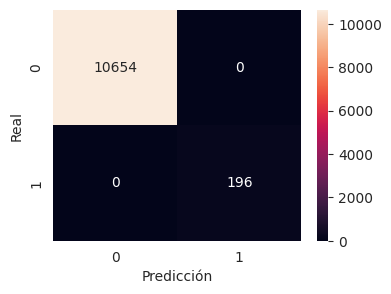

In [ ]:
# Predecir los valores de prueba
y_pred_lgbm = lgbm.predict(X_test1)

# Crear la matriz de confusión
cm = confusion_matrix(y_test1, y_pred_lgbm)


plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

Se observa que se detectaron correctamente los 196 casos positivos sin errores por lo que el modelo es optimo

###9.5 Movimiento de Umbral

Calculo la probabilidad de que cada paciente tenga un ACV

In [ ]:
#Seteo las visualizaciones para que no las resuma asi puedo ver todas las columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
proba2 = lgbm.predict_proba(X)[:, 1]
df['probabilidad'] = proba2
df['probabilidad'] = df['probabilidad'].map(lambda x: f'{x:.1%}')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,outlier_isolation,outlier_zscore,outlier_iqr,rangos_etarios,probabilidad
0,30669,Male,3.0,0,0,0,children,0,95.12,18.0,Unknow,0,0,0,0,0,0.0%
1,30468,Male,58.0,1,0,1,Private,1,87.96,39.2,never smoked,0,0,0,0,3,0.0%
2,16523,Female,8.0,0,0,0,Private,1,110.89,17.6,Unknow,0,1,0,0,0,0.0%
3,56543,Female,70.0,0,0,1,Private,0,69.04,35.9,formerly smoked,0,0,0,0,4,0.0%
4,46136,Male,14.0,0,0,0,Never_worked,0,161.28,19.1,Unknow,0,1,0,0,1,0.0%
5,32257,Female,47.0,0,0,1,Private,1,210.95,50.1,Unknow,0,1,0,0,3,0.0%
6,52800,Female,52.0,0,0,1,Private,1,77.59,17.7,formerly smoked,0,1,0,0,3,0.0%
7,41413,Female,75.0,0,1,1,Self-employed,0,243.53,27.0,never smoked,0,1,0,0,5,0.0%
8,15266,Female,32.0,0,0,1,Private,0,77.67,32.3,smokes,0,0,0,0,2,0.0%
9,28674,Female,74.0,1,0,1,Self-employed,1,205.84,54.6,never smoked,0,1,0,0,5,0.0%


Filtro a los que tienen altas probabilidades pero no han padecido un ACV

In [ ]:
en_riesgo = (proba2 > 0.9) & (df['stroke'] == 0)
resultado = df[en_riesgo]
resultado.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,outlier_isolation,outlier_zscore,outlier_iqr,rangos_etarios,probabilidad
30053,1274,Male,74.0,0,0,1,Private,1,102.08,28.605038,Unknow,0,0,0,0,5,93.8%


In [ ]:
en_riesgo = (proba2 > 0.8) & (df['stroke'] == 0) & (proba2 < 0.9)
resultado = df[en_riesgo]
resultado.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,outlier_isolation,outlier_zscore,outlier_iqr,rangos_etarios,probabilidad
27936,59791,Female,80.0,1,1,1,Private,0,71.07,28.605038,Unknow,0,0,0,0,5,81.3%
41984,33757,Female,80.0,0,1,1,Private,1,240.18,29.900000,never smoked,0,1,0,0,5,85.8%


In [ ]:
en_riesgo = (proba2 > 0.7) & (df['stroke'] == 0) & (proba2 < 0.8)
resultado = df[en_riesgo]
resultado.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,outlier_isolation,outlier_zscore,outlier_iqr,rangos_etarios,probabilidad
13793,28790,Male,79.0,0,1,1,Self-employed,0,264.43,30.6,formerly smoked,0,1,0,0,5,77.5%
30467,68711,Female,72.0,1,1,1,Private,0,224.74,27.8,smokes,0,1,0,0,5,76.0%


Observo cuantas personas son de alto riesgo de ACV para poder realizar un control preventivo e informar al paciente

In [ ]:
resultado.shape

(1, 14)

Esta persona no ha sufrido un ACV pero esta en riesgo y debe ser advertida

###9.6 MLOps

In [ ]:
# Montaje de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/A-DataScience2/00_Proyecto_final_3'

# Llamar a la función de guardar después de entrenar el modelo
ruta_modelo = os.path.join(file_path, 'lgbm_tuning_model.joblib')
dump(lgbm, ruta_modelo)
print(f"Modelo guardado en: {ruta_modelo}")

Modelo guardado en: /content/drive/MyDrive/A-DataScience2/00_Proyecto_final_3/lgbm_tuning_model.joblib


In [ ]:
# Llamar a la función de cargar
modelo_cargado = load(ruta_modelo)
print(f"Modelo cargado desde: {ruta_modelo}")

# Uso del modelo cargado para hacer predicciones
y_pred = modelo_cargado.predict(X_test) # El X_test NO QUEDA GUARDADO EN EL .joblib
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo cargado:", accuracy)

Modelo cargado desde: /content/drive/MyDrive/A-DataScience2/00_Proyecto_final_3/lgbm_tuning_model.joblib
Exactitud del modelo cargado: 0.9996715003050354


##Seccion 10 - Feature engeneering 2° parte

###10.1 Feature Importance

Observo que features tienen mayor influencia sobre el resultado

In [ ]:
# Obtener la importancia de las features
feature_importance = lgbm.feature_importances_

# Crear un DataFrame con las importancias de las features
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

#print(feature_importance_df)
feature_importance_df

,Feature,Importance
1,avg_glucose_level,41674
2,bmi,35918
7,age,35521
6,Residence_type,7890
8,gender_Female,5542
17,smoking_status_formerly smoked,4748
18,smoking_status_never smoked,4600
13,work_type_Private,4277
3,hypertension,3863
4,heart_disease,3453


Las features mas importantes son nivel promedio de glucosa, indice de masa corporal y edad

###10.2 permutation_importance

In [ ]:
perm_importance = permutation_importance(lgbm, X_test, y_test, n_repeats=5, random_state=49150)
pd.Series(perm_importance.importances_mean, index=X_train.columns).sort_values(ascending=False)

age                               2.896616e-01
avg_glucose_level                 1.413300e-01
bmi                               1.277113e-01
id                                3.047539e-02
heart_disease                     2.404618e-02
ever_married                      5.209067e-03
hypertension                      4.617767e-03
smoking_status_Unknow             4.035853e-04
gender_Male                       1.877141e-05
work_type_Never_worked            0.000000e+00
gender_Other                      0.000000e+00
gender_Female                    -2.220446e-17
work_type_children               -9.385706e-06
smoking_status_formerly smoked   -1.877141e-05
work_type_Govt_job               -3.754282e-05
smoking_status_smokes            -3.754282e-05
work_type_Private                -5.631423e-05
Residence_type                   -8.447135e-05
work_type_Self-employed          -1.032428e-04
smoking_status_never smoked      -1.595570e-04
dtype: float64

Aqui confirmamos que las features mas importantes son nivel promedio de glucosa, indice de masa corporal y edad

##Seccion 11 - Otros modelos analizados

####11.1 Bosque aleatorio + Ejercicio Cross Validation

En este ejercicio aplico K-folds para realizar una validacion cruzada del modelo

In [ ]:
# Crear el objeto de sobremuestreo
ros = RandomOverSampler(random_state=49150)
# Aplicar el sobremuestreo. Ahora tengo X e y balanceadas
X_resampled, y_resampled = ros.fit_resample(X, y)

In [ ]:
#Separo en train y test sin cross Validation
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=49150)
print(f'Train set: {len(X_train)}, Test set:{len(X_test)}')

Train set: 63925, Test set:21309


In [ ]:
#Separo en train y test usando cross validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_resampled, y_resampled):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 68187, Test set:17047
Fold:2, Train set: 68187, Test set:17047
Fold:3, Train set: 68187, Test set:17047
Fold:4, Train set: 68187, Test set:17047
Fold:5, Train set: 68188, Test set:17046


In [ ]:
#Inicializo el modelo de clasificacion
BA_model = RandomForestClassifier(random_state = 49150, max_depth = 16 ,min_samples_split = 0.219, n_estimators = 749, class_weight='balanced')
#Entrenamiento de bosque aleatorio
BA_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=16,
                       min_samples_split=0.219, n_estimators=749,
                       random_state=49150)

Calculo la metrica "Accuracy" Con cross validation

In [ ]:
score = cross_val_score(BA_model, X_resampled, y_resampled, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.76359477 0.76195225 0.76353611 0.76482666 0.77214596]
Average score: 0.77


Calculo metricas sin cross validation

In [ ]:
# Predecir los valores de prueba
y_pred_Bosque = BA_model.predict(X_test)

#Predecir los valores de entrenamiento
y_pred_train_Bosque= BA_model.predict(X_train)
print(f'Accuracy: ', accuracy_score(y_test, y_pred_Bosque))

#print("Prediccion de valores de prueba: ",y_pred_Bosque)
#print("Prediccion de valores de entrenmiento: ",y_pred_train_Bosque)

Accuracy:  0.7613684358721667


Conclusión de la validación cruzada: Se puede ver que el promedio de la métrica "Accuracy" es mucho mejor que el del modelo sin validación cruzada. También se ve que las métricas de los 5 segmentos de validación cruzada son parecidos, lo que me da un indicio de que el modelo es bastante consistente ente diferentes sets de entrenamiento y testeo

####11.2 Arbol de decisión

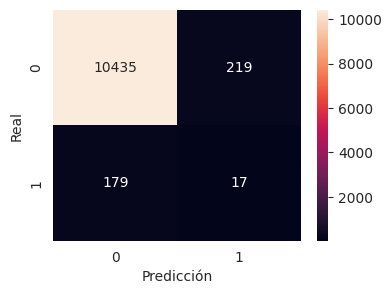

In [ ]:
# 1. Arbol de clasificación
model = DecisionTreeClassifier(random_state=83, criterion='entropy', min_samples_leaf=1, max_features=None, splitter='best')
model.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred = model.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Agrego título
#plt.title('Glucosa en sangre para personas que viven en campo o ciudad')

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

Arbol equilibrado con Over Sampler

In [ ]:
# Crear el objeto de sobremuestreo
ros = RandomOverSampler(random_state=49150)

# Aplicar el sobremuestreo
X_resampled, y_resampled = ros.fit_resample(X, y)

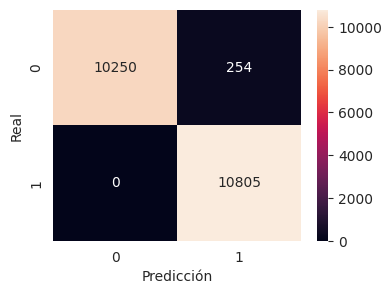

In [ ]:
#X_resampled, y_resampled
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=0)

modelR = DecisionTreeClassifier(random_state=83, criterion='entropy', min_samples_leaf=1, max_features=None, splitter='best')
modelR.fit(X_train_R, y_train_R)

# Predecir los valores de prueba
y_pred_R = modelR.predict(X_test_R)

# Crear la matriz de confusión
cm = confusion_matrix(y_test_R, y_pred_R)


plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

Pruebo el modelo con los valores de testeo

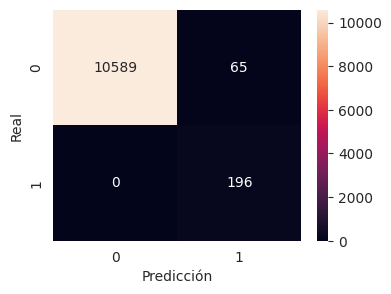

In [ ]:
# Predecir los valores de prueba
y_pred_RR = modelR.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_RR)


plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

Se observa una mejora considerable en la prediccion. incluso los 65 casos que fueron predecidos como positivos seguramente tienen parametros que evidencian un posible ACV por lo que será necesario advertir a esos pacientes

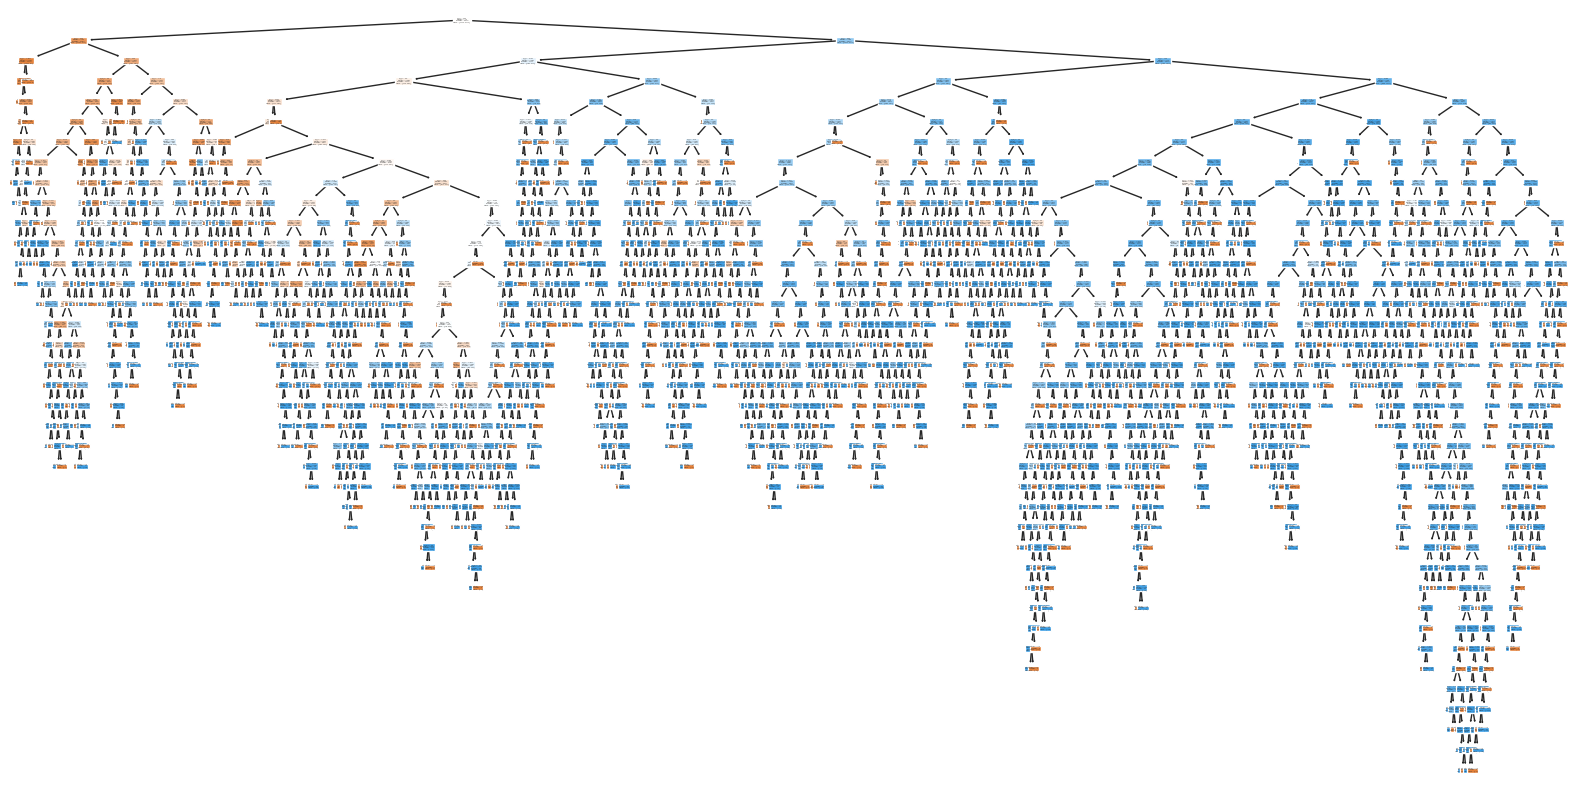

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(modelR, filled=True)#, feature_names=df_limpia.feature_names, class_names=df_limpia.target_names)
plt.show()

Feature importances

In [ ]:
# Obtener la importancia de las features
feature_importance = modelR.feature_importances_

# Crear un DataFrame con las importancias de las features
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print(feature_importance_df)

                           Feature  Importance
6                              age    0.387016
0                avg_glucose_level    0.230203
1                              bmi    0.202317
5                   Residence_type    0.026753
18           smoking_status_smokes    0.020167
17     smoking_status_never smoked    0.018265
13         work_type_Self-employed    0.017736
2                     hypertension    0.015803
3                    heart_disease    0.013379
10              work_type_Govt_job    0.012504
15           smoking_status_Unknow    0.010049
12               work_type_Private    0.010036
16  smoking_status_formerly smoked    0.009417
7                    gender_Female    0.009319
8                      gender_Male    0.009098
4                     ever_married    0.007746
14              work_type_children    0.000190
11          work_type_Never_worked    0.000000
9                     gender_Other    0.000000


Permutation importances

In [ ]:
perm_importance = permutation_importance(modelR, X_test, y_test, n_repeats=10, random_state=49150)
pd.Series(perm_importance.importances_mean, index=X_train.columns).sort_values(ascending=False)

age                               0.027779
avg_glucose_level                 0.027032
bmi                               0.026719
heart_disease                     0.005327
hypertension                      0.005180
smoking_status_never smoked       0.005032
Residence_type                    0.004194
smoking_status_smokes             0.003456
ever_married                      0.003244
smoking_status_Unknow             0.003060
smoking_status_formerly smoked    0.002959
gender_Female                     0.002664
work_type_Govt_job                0.002627
work_type_Self-employed           0.002488
gender_Male                       0.002240
work_type_Private                 0.001696
work_type_Never_worked            0.000000
work_type_children                0.000000
gender_Other                      0.000000
dtype: float64

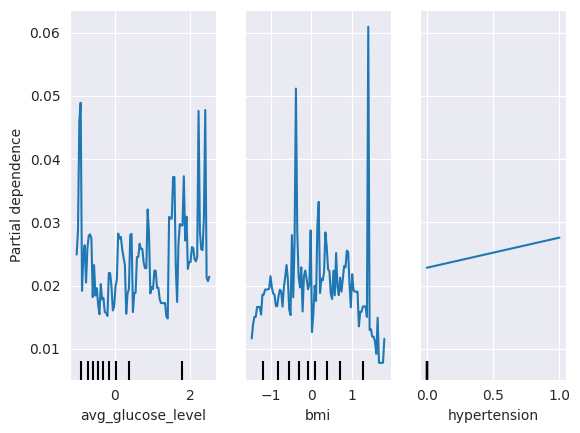

In [ ]:
features = [0, 1, 2]
PartialDependenceDisplay.from_estimator(modelR, X_train, features, feature_names=X_train.columns, grid_resolution=100)
plt.show()

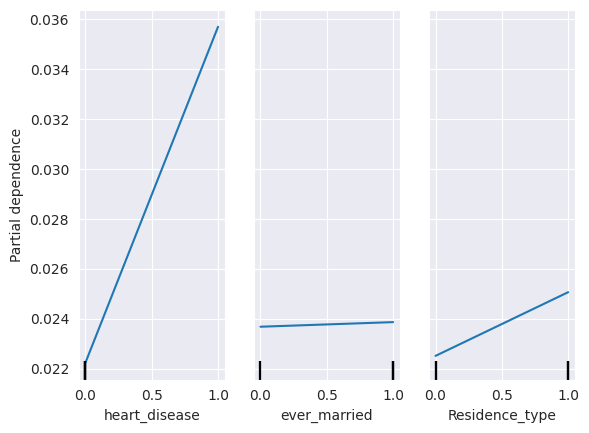

In [ ]:
features = [3,4,5]
PartialDependenceDisplay.from_estimator(modelR, X_train, features, feature_names=X_train.columns, grid_resolution=100)
plt.show()

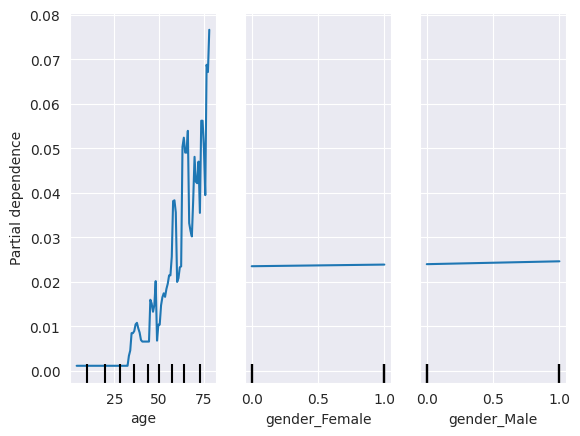

In [ ]:
features = [6,7,8]
PartialDependenceDisplay.from_estimator(modelR, X_train, features, feature_names=X_train.columns, grid_resolution=100)
plt.show()

Canaritos


PCA

Binning/Backeting

Equilibro con SMOTE

In [ ]:
# Crear el objeto SMOTE
smote = SMOTE(random_state=49150)

# Aplicar SMOTE
X_smote, y_smote = smote.fit_resample(X, y)

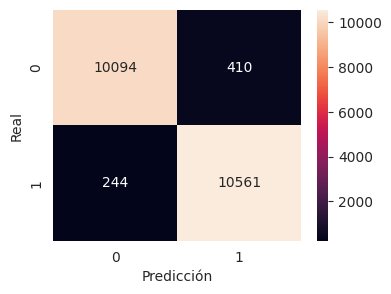

In [ ]:
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_smote, y_smote, test_size=0.25, random_state=0)

modelS = DecisionTreeClassifier(random_state=83, criterion='entropy', min_samples_leaf=1, max_features=None, splitter='best')
modelS.fit(X_train_S, y_train_S)

# Predecir los valores de prueba
y_pred_S = modelS.predict(X_test_S)

# Crear la matriz de confusión
cm = confusion_matrix(y_test_S, y_pred_S)


plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

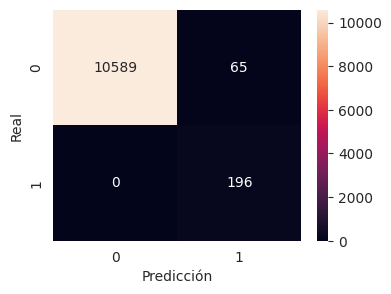

In [ ]:
# Predecir los valores de prueba
y_pred_SS = model.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_SS)


plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

Optimización de hiperparámetros con Bayes Search

In [ ]:
# Definir el espacio de búsqueda de hiperparámetros para RandomForestClassifier
search_space = {
    'criterion': ('entropy','gini'),
    'splitter': ('best','random'),
    'min_samples_leaf': Integer(1, 100),
    'max_depth': Integer(1, 20),
    'min_samples_split': Real(0.01, 1.0, 'uniform')
}


# Instanciar BayesSearchCV con el modelo y el espacio de búsqueda
clf = DecisionTreeClassifier(random_state=49150)
bayes_search = BayesSearchCV(clf, search_space, n_iter=5, scoring='f1', cv=5, random_state=49150, n_jobs=-1)

# Ajustar BayesSearchCV al conjunto de entrenamiento
bayes_search.fit(X_train_R, y_train_R)

# Imprimir mejores parametros
print(f'Best Parameters: {bayes_search.best_params_}')

Best Parameters: OrderedDict([('criterion', 'entropy'), ('max_depth', 1), ('min_samples_leaf', 88), ('min_samples_split', 0.805536629381899), ('splitter', 'best')])


In [ ]:
# Predecir sobre el conjunto de prueba
y_pred = bayes_search.predict(X_test_R)
y_proba = bayes_search.predict_proba(X_test_R)[:, 1]

# Calcular métricas
accuracy = accuracy_score(y_test_R, y_pred)
cm = confusion_matrix(y_test_R, y_pred)
precision = precision_score(y_test_R, y_pred)
recall = recall_score(y_test_R, y_pred)
f1 = f1_score(y_test_R, y_pred)
roc_auc = roc_auc_score(y_test_R, y_proba)

# Imprimir las métricas
print('Accuracy: ', accuracy)
print(cm)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 - score: ', f1)
print('ROC AUC: ', roc_auc)

Accuracy:  0.7565817260312544
[[6247 4257]
 [ 930 9875]]
Precision:  0.6987687517690349
Recall:  0.9139287366959741
F1 - score:  0.7919958294903157
ROC AUC:  0.754327277715847


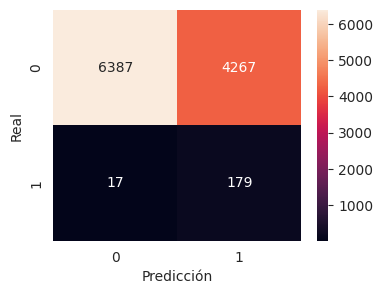

In [ ]:
# Predecir los valores de prueba
y_pred = bayes_search.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

Veo cuales son los features que mas peso tienen sobre l apredicción

In [ ]:
feature_importance = bayes_search.best_estimator_.feature_importances_
pd.Series(feature_importance, index=X_train.columns).sort_values(ascending=False)

age                               1.0
avg_glucose_level                 0.0
work_type_Govt_job                0.0
smoking_status_never smoked       0.0
smoking_status_formerly smoked    0.0
smoking_status_Unknow             0.0
work_type_children                0.0
work_type_Self-employed           0.0
work_type_Private                 0.0
work_type_Never_worked            0.0
gender_Other                      0.0
bmi                               0.0
gender_Male                       0.0
gender_Female                     0.0
Residence_type                    0.0
ever_married                      0.0
heart_disease                     0.0
hypertension                      0.0
smoking_status_smokes             0.0
dtype: float64

Caracteristicas polinamiales. Combino features para encontrar conjunto de variables relevantes

In [ ]:
# Armar PolynomialFeatures de hasta grado 2
poly = PolynomialFeatures(degree=3, include_bias=False)

# Ajustar y transformar las nuevas variables
X_poly = poly.fit_transform(X)

feature_names = poly.get_feature_names_out(X.columns)

# Crear nuevo dataframe
X_poly_df = pd.DataFrame(X_poly, columns = feature_names)

# Visualizar nuevas features
print(X_poly_df.head())

   avg_glucose_level       bmi  hypertension  heart_disease  ever_married  \
0          -0.217176 -1.388469           0.0            0.0           0.0   
1          -0.383258  1.387150           1.0            0.0           1.0   
2           0.148621 -1.440839           0.0            0.0           0.0   
3          -0.822123  0.955096           0.0            0.0           1.0   
4           1.317458 -1.244451           0.0            0.0           0.0   

   Residence_type   age  gender_Female  gender_Male  gender_Other  ...  \
0             0.0   3.0            0.0          1.0           0.0  ...   
1             1.0  58.0            0.0          1.0           0.0  ...   
2             1.0   8.0            1.0          0.0           0.0  ...   
3             0.0  70.0            1.0          0.0           0.0  ...   
4             0.0  14.0            0.0          1.0           0.0  ...   

   smoking_status_formerly smoked^3  \
0                               0.0   
1             

In [ ]:
# Crear el objeto de sobremuestreo
ros = RandomOverSampler(random_state=49150)

# Aplicar el sobremuestreo
X_resampled, y_resampled = ros.fit_resample(X_poly_df, y)

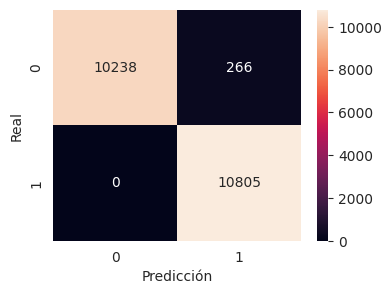

In [ ]:
#X_resampled, y_resampled
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=0)

model = DecisionTreeClassifier(random_state=83, criterion='entropy', min_samples_leaf=1, max_features=None, splitter='best')
model.fit(X_train_R, y_train_R)

# Predecir los valores de prueba
y_pred_R = model.predict(X_test_R)

# Crear la matriz de confusión
cm = confusion_matrix(y_test_R, y_pred_R)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

In [ ]:
# Definir el espacio de búsqueda de hiperparámetros para RandomForestClassifier
search_space = {
    'criterion': ('entropy','gini'),
    'splitter': ('best','random'),
    'min_samples_leaf': Integer(1, 100),
    'max_depth': Integer(1, 20),
    'min_samples_split': Real(0.01, 1.0, 'uniform')
}


# Instanciar BayesSearchCV con el modelo y el espacio de búsqueda
clf = DecisionTreeClassifier(random_state=49150)
bayes_search = BayesSearchCV(clf, search_space, n_iter=5, scoring='f1', cv=5, random_state=49150, n_jobs=-1)

# Ajustar BayesSearchCV al conjunto de entrenamiento
bayes_search.fit(X_train_R, y_train_R)

# Imprimir mejores parametros
print(f'Best Parameters: {bayes_search.best_params_}')

Best Parameters: OrderedDict([('criterion', 'entropy'), ('max_depth', 1), ('min_samples_leaf', 88), ('min_samples_split', 0.805536629381899), ('splitter', 'best')])


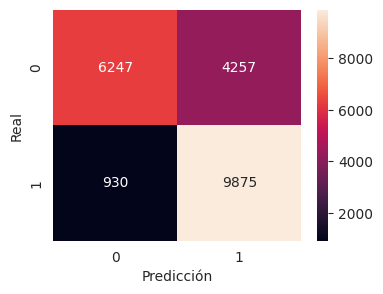

In [ ]:
# Predecir los valores de prueba
y_pred = bayes_search.predict(X_test_R)

# Crear la matriz de confusión
cm = confusion_matrix(y_test_R, y_pred)


plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

In [ ]:
feature_importance = bayes_search.best_estimator_.feature_importances_
pd.Series(feature_importance, index=X_train_R.columns).sort_values(ascending=False)

age                                                   1.0
avg_glucose_level                                     0.0
Residence_type gender_Male work_type_Private          0.0
Residence_type gender_Other work_type_Private         0.0
Residence_type gender_Other work_type_Never_worked    0.0
                                                     ... 
bmi gender_Male smoking_status_Unknow                 0.0
bmi gender_Male work_type_children                    0.0
bmi gender_Male work_type_Self-employed               0.0
bmi gender_Male work_type_Private                     0.0
smoking_status_smokes^3                               0.0
Length: 1539, dtype: float64

####11.3 Bosque aleatorio + Ejercicio Cross Validation

En este ejercicio aplico K-folds para realizar una validacion cruzada del modelo

In [ ]:
# Crear el objeto de sobremuestreo
ros = RandomOverSampler(random_state=49150)
# Aplicar el sobremuestreo. Ahora tengo X e y balanceadas
X_resampled, y_resampled = ros.fit_resample(X, y)

In [ ]:
#Separo en train y test sin cross Validation
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=49150)
print(f'Train set: {len(X_train)}, Test set:{len(X_test)}')

Train set: 63925, Test set:21309


In [ ]:
#Inicializo el modelo de clasificacion
BA_model = RandomForestClassifier(random_state = 49150, max_depth = 16 ,min_samples_split = 0.219, n_estimators = 749, class_weight='balanced')
#Entrenamiento de bosque aleatorio
BA_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=16,
                       min_samples_split=0.219, n_estimators=749,
                       random_state=49150)

Calculo metricas

In [ ]:
# Predecir los valores de prueba
y_pred_Bosque = BA_model.predict(X_test)

#Predecir los valores de entrenamiento
y_pred_train_Bosque= BA_model.predict(X_train)
print(f'Accuracy: ', accuracy_score(y_test, y_pred_Bosque))

#print("Prediccion de valores de prueba: ",y_pred_Bosque)
#print("Prediccion de valores de entrenmiento: ",y_pred_train_Bosque)

Accuracy:  0.7613684358721667


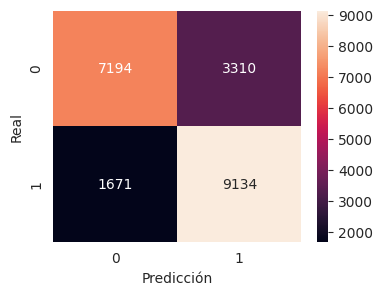

In [ ]:
# Creo la matriz de confusión
cm_Bosque = confusion_matrix(y_test, y_pred_Bosque)

#HeatMap del Arbol
plt.figure(figsize=(4,3))
sns.heatmap(cm_Bosque, annot=True, fmt='d')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

In [ ]:
BAR_model = RandomForestClassifier(random_state = 49150, max_depth = 16 ,min_samples_split = 0.219, n_estimators = 749, class_weight='balanced')
BAR_model.fit(X_train_R, y_train_R)

RandomForestClassifier(class_weight='balanced', max_depth=16,
                       min_samples_split=0.219, n_estimators=749,
                       random_state=49150)

Precision del Bosque aleatorio de decision:  0.7662490027687832
Accuracy:  0.7662490027687832
Recall:  0.8453493752892179


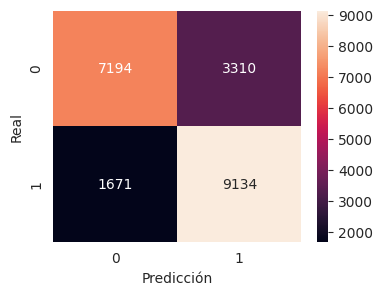

In [ ]:
# Predecir los valores de prueba
y_pred_Bosque_R = BAR_model.predict(X_test_R)

#Precision y accuracy del bosque aleatorio
print("Precision del Bosque aleatorio de decision: ",BAR_model.score(X_test_R, y_test_R))
print(f'Accuracy: ', accuracy_score(y_test_R, y_pred_Bosque_R))
print(f'Recall: ', recall_score(y_test_R, y_pred_Bosque_R))

# Creo la matriz de confusión
cm_Bosque_R = confusion_matrix(y_test_R, y_pred_Bosque_R)

#HeatMap del Arbol
plt.figure(figsize=(4,3))
sns.heatmap(cm_Bosque_R, annot=True, fmt='d')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

#Predecir los valores de entrenamiento
#y_pred_train_Bosque_R= BAR_model.predict(X_train_R)

#print("Prediccion de valores de prueba: ",y_pred_Bosque_R)
#print("Prediccion de valores de entrenmiento: ",y_pred_train_Bosque_R)

Ahora veo como funciona con el test

Precision del Bosque aleatorio de decision:  0.6904147465437788
Accuracy:  0.6727188940092166
Recall:  0.8877551020408163


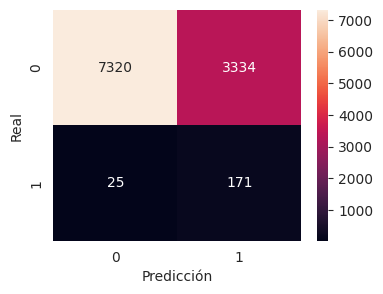

In [ ]:
# Predecir los valores de prueba
y_pred_Bosque_B = BAR_model.predict(X_test)

#Precision y accuracy del bosque aleatorio
print("Precision del Bosque aleatorio de decision: ",BAR_model.score(X_test, y_test))
print(f'Accuracy: ', accuracy_score(y_test, y_pred_Bosque))
print(f'Recall: ', recall_score(y_test, y_pred_Bosque))

# Creo la matriz de confusión
cm_Bosque_B = confusion_matrix(y_test, y_pred_Bosque_B)

#HeatMap del Arbol
plt.figure(figsize=(4,3))
sns.heatmap(cm_Bosque_B, annot=True, fmt='d')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

Intento mejorar los hiperparámetros

In [ ]:
# Definir el espacio de búsqueda de hiperparámetros para RandomForestClassifier
search_space = {
    'n_estimators': Integer(10, 1000),
    'max_depth': Integer(1, 20),
    'min_samples_split': Real(0.01, 1.0, 'uniform')
}

# Instanciar BayesSearchCV con el modelo y el espacio de búsqueda
clf = RandomForestClassifier(random_state=49150)
bayes_search = BayesSearchCV(clf, search_space, n_iter=5, scoring='recall', cv=10, random_state=49150, n_jobs=-1)

# Ajustar BayesSearchCV al conjunto de entrenamiento
bayes_search.fit(X_train, y_train)

# Imprimir mejores parametros
print(f'Best Parameters: {bayes_search.best_params_}')

Best Parameters: OrderedDict([('max_depth', 16), ('min_samples_split', 0.21925238956743517), ('n_estimators', 749)])


In [ ]:
# Predecir sobre el conjunto de prueba
y_pred = bayes_search.predict(X_test)
y_proba = bayes_search.predict_proba(X_test)[:, 1]

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Imprimir las métricas
print('Accuracy: ', accuracy)
print(cm)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 - score: ', f1)
print('ROC AUC: ', roc_auc)

Accuracy:  0.9819354838709677
[[10654     0]
 [  196     0]]
Precision:  0.0
Recall:  0.0
F1 - score:  0.0
ROC AUC:  0.8629031253950802


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Aunque optimicé los hiperparámetros los resultados no son satisfactorios

####11.4 XGBoost

In [ ]:
# Instanciar XGBoost
xgb = XGBClassifier(objective='multi:softmax', num_class=2, seed=49150, enable_categorical=True)

# Ajustar modelo
xgb.fit(X_train, y_train)

# Predecir
y_pred_xgb = xgb.predict(X_test)

# Calcular métricas
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)



In [ ]:
# Imprimir métricas
print('Accuracy: ', accuracy_xgb)
print(cm_xgb)
print('Precision: ', precision_xgb)
print('Recall: ', recall_xgb)
print('F1 Score: ', f1_xgb)

Accuracy:  0.9813824884792627
[[10647     7]
 [  195     1]]
Precision:  0.125
Recall:  0.00510204081632653
F1 Score:  0.009803921568627449


####11.5 Catboost

In [ ]:
# Instanciar CatBoost
catboost = CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=3, verbose=False)

# Ajustar modelo
catboost.fit(X_train, y_train)

# Predecir
y_pred_cat = catboost.predict(X_test)

# Calcular métricas
accuracy_cat = accuracy_score(y_test, y_pred_cat)
cm_cat = confusion_matrix(y_test, y_pred_cat)
precision_cat = precision_score(y_test, y_pred_cat)#, average='weighted')
recall_cat = recall_score(y_test, y_pred_cat)#, average='weighted')
f1_cat = f1_score(y_test, y_pred_cat)#, average='weighted')

# Imprimir métricas
print('Accuracy: ', accuracy_cat)
print(cm_cat)
print('Precision: ', precision_cat)
print('Recall: ', recall_cat)
print('F1 Score: ', f1_cat)

Accuracy:  0.9818433179723502
[[10653     1]
 [  196     0]]
Precision:  0.0
Recall:  0.0
F1 Score:  0.0


####11.6 LGBM

In [ ]:
# Instanciar LGBM
lgbm = LGBMClassifier(n_estimators=1000, learning_rate=0.1, verbose=-1)

# Ajustar modelo
lgbm.fit(X_train1, y_train1)

# Predecir
y_pred_lgbm = lgbm.predict(X_test1)

# Calcular métricas
accuracy_lgbm = accuracy_score(y_test1, y_pred_lgbm)
cm_lgbm = confusion_matrix(y_test1, y_pred_lgbm)
precision_lgbm = precision_score(y_test1, y_pred_lgbm)#, average='weighted')
recall_lgbm = recall_score(y_test1, y_pred_lgbm)#, average='weighted')
f1_lgbm = f1_score(y_test1, y_pred_lgbm)#, average='weighted')

# Imprimir métricas
print('Accuracy: ', accuracy_lgbm)
print(cm_lgbm)
print('Precision: ', precision_lgbm)
print('Recall: ', recall_lgbm)
print('F1 Score: ', f1_lgbm)

Accuracy:  0.9802764976958526
[[10634    20]
 [  194     2]]
Precision:  0.09090909090909091
Recall:  0.01020408163265306
F1 Score:  0.018348623853211007


Se observa que en primera instancia las métricas son muy malas

LGBM con clases balanceadas

In [ ]:
# Defino X e y
X = df_limpia.drop(['stroke','id'], axis=1)
y = df_limpia['stroke']

# Crear el objeto de sobremuestreo
ros = RandomOverSampler(random_state=49150)
# Aplicar el sobremuestreo
X_resampled, y_resampled = ros.fit_resample(X, y)

# Divido el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=49150)

In [ ]:
# Instanciar LGBM
lgbm = LGBMClassifier(n_estimators=1000, learning_rate=0.1, verbose=-1)

# Ajustar modelo
lgbm.fit(X_train, y_train)

# Predecir
y_pred_lgbm = lgbm.predict(X_test)

# Calcular métricas
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm)#, average='weighted')
recall_lgbm = recall_score(y_test, y_pred_lgbm)#, average='weighted')
f1_lgbm = f1_score(y_test, y_pred_lgbm)#, average='weighted')

# Imprimir métricas
print('Accuracy: ', accuracy_lgbm)
print(cm_lgbm)
print('Precision: ', precision_lgbm)
print('Recall: ', recall_lgbm)
print('F1 Score: ', f1_lgbm)

Accuracy:  0.9924445070158149
[[10534   161]
 [    0 10614]]
Precision:  0.9850580046403712
Recall:  1.0
F1 Score:  0.9924727663752396


Mucho mejor

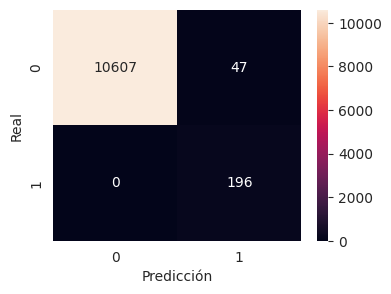

In [ ]:
# Predecir los valores de prueba
y_pred_lgbm = lgbm.predict(X_test1)

# Crear la matriz de confusión
cm = confusion_matrix(y_test1, y_pred_lgbm)


plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

Movimiento de umbral

In [ ]:
# Crear y entrenar el modelo de RandomForest con class_weight 'balanced'
lgbm_umbral = LGBMClassifier(n_estimators=1000, learning_rate=0.1, verbose=-1)
lgbm_umbral.fit(X_train, y_train)

LGBMClassifier(n_estimators=1000, verbose=-1)

In [ ]:
#Seteo las visualizaciones para que no las resuma asi puedo ver todas las columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# Predecir las probabilidades para el conjunto de prueba
probabilities = lgbm_umbral.predict_proba(X_test)[:, 1]

# Definir un nuevo umbral
threshold = 0.9

# Generar predicciones basadas en el nuevo umbral
predictions = (probabilities >= threshold).astype(int)

# Evaluar las predicciones
#print(classification_report(y_test, predictions))

Agrego la columna probabilities a el dataset original

In [ ]:
proba2 = lgbm_umbral.predict_proba(X)[:, 1]
df['probabilidad'] = proba2
df['probabilidad'] = df['probabilidad'].map(lambda x: f'{x:.1%}')
df.head(100)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,probabilidad
0,30669,Male,3.0,0,0,0,children,0,95.12,18.000000,Unknow,0,0.0%
1,30468,Male,58.0,1,0,1,Private,1,87.96,39.200000,never smoked,0,1.7%
2,16523,Female,8.0,0,0,0,Private,1,110.89,17.600000,Unknow,0,0.0%
3,56543,Female,70.0,0,0,1,Private,0,69.04,35.900000,formerly smoked,0,1.9%
4,46136,Male,14.0,0,0,0,Never_worked,0,161.28,19.100000,Unknow,0,0.0%
5,32257,Female,47.0,0,0,1,Private,1,210.95,50.100000,Unknow,0,0.0%
6,52800,Female,52.0,0,0,1,Private,1,77.59,17.700000,formerly smoked,0,0.0%
7,41413,Female,75.0,0,1,1,Self-employed,0,243.53,27.000000,never smoked,0,3.3%
8,15266,Female,32.0,0,0,1,Private,0,77.67,32.300000,smokes,0,0.2%
9,28674,Female,74.0,1,0,1,Self-employed,1,205.84,54.600000,never smoked,0,0.1%


####11.7 Keras

In [ ]:
X_resampled = np.asarray(X_resampled).astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=49150)

# Crear un modelo secuencial
model = Sequential()

# Añadir capas al modelo
model.add(Dense(64, activation='relu', input_dim=100))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#X_train

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 100), found shape=(None, 19)


In [ ]:
X_resampled = np.asarray(X_resampled).astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=49150)

# Instanciar el modelo
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid'),
    Dense(64, activation='relu')
])

# Añadir capas al modelo
#model.add(Dense(64, activation='relu', input_dim=100))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, validation_split=0.25, verbose=0)

# Evaluar
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: ', accuracy)

Accuracy:  0.4980993866920471


Accuracy 0,77 hay que seguir mejorando

####11.8 MLFog

In [ ]:
# Configurar el URI de seguimiento de MLflow para usar Google Drive
mlflow.set_tracking_uri('/content/drive/MyDrive/A-DataScience2/00_Proyecto_final_3/mlruns')

# Configurar el nombre del experimento
mlflow.set_experiment('Experimento_RandomForest')

2024/06/17 22:35:54 INFO mlflow.tracking.fluent: Experiment with name 'Experimento_RandomForest' does not exist. Creating a new experiment.


<Experiment: artifact_location='/content/drive/MyDrive/A-DataScience2/00_Proyecto_final_3/mlruns/416580889758096347', creation_time=1718663754340, experiment_id='416580889758096347', last_update_time=1718663754340, lifecycle_stage='active', name='Experimento_RandomForest', tags={}>

In [ ]:
#Primera corrida
#Inicializo el modelo de clasificacion
BA_model = RandomForestClassifier(random_state = 49150, max_depth = 16 ,min_samples_split = 0.219, n_estimators = 749, class_weight='balanced')

# Habilito autolog
mlflow.autolog()

# Comienzo corrida
with mlflow.start_run(run_name='no_tuning', log_system_metrics=True):

    # Ajusto modelo
    BA_model.fit(X_train, y_train)

    # Predigo
    y_pred = BA_model.predict(X_test)

# Ciero corrida
mlflow.end_run()
